In [101]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys

import mygabasic as ga
 
%aimport mygabasic

HOlA MYGABASIC
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Multimodal Optimization

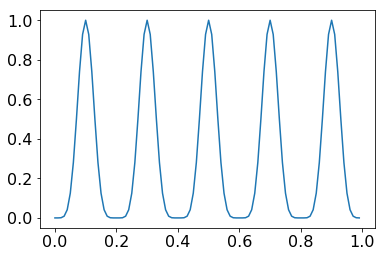

In [102]:
def M1(x):
    out = np.power(np.sin(5*np.pi*x), 6)
    return out

x = np.arange(0, 1, 0.01)
y = M1(x)
plt.plot(x, y)
plt.show()  

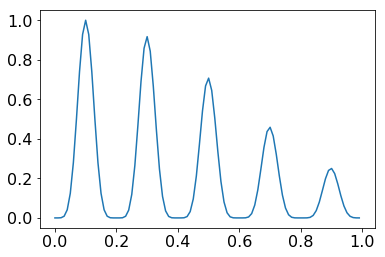

In [103]:
def M2(x):
    out = np.exp(-2*np.log(2)*np.power(((x-0.1)/0.8),2))*M1(x)
    return out

x = np.arange(0, 1, 0.01)
y = M2(x)
plt.plot(x, y)
plt.show()  

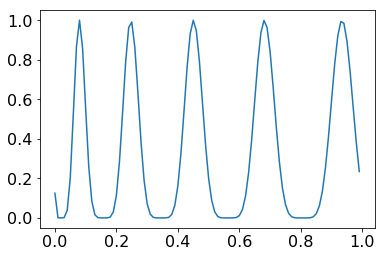

In [104]:
def M3(x):
    out = np.power(np.sin(5*np.pi*(np.power(x,0.75) - 0.05)), 6)
    return out

x = np.arange(0, 1, 0.01)
y = M3(x)
plt.plot(x, y)
plt.show()  

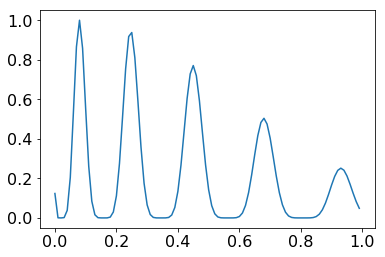

In [105]:
def M4(x):
    out = np.exp(-2*np.log(2)*np.power(((x-0.08)/0.854),2))*M3(x)
    return out

x = np.arange(0, 1, 0.01)
y = M4(x)
plt.plot(x, y)
plt.show()  

## Deterministic Crowding

### M1

 Iteration 2

Last fit info______
Last fit mean: 0.0040258696506601955
Last fit std: 0.03557259296648396
Last fit median: 1.0220733970830564e-07
Last fit min: 1.1478298201428905e-15
Last fit max: 0.4382648579263089
Last Pop info______
Last Pop mean: [0.50824106]
Last Pop std: [0.24749743]
Last Pop median: [0.58319219]
Last Pop min: [0.00215915]
Last Pop max: [0.99831388]


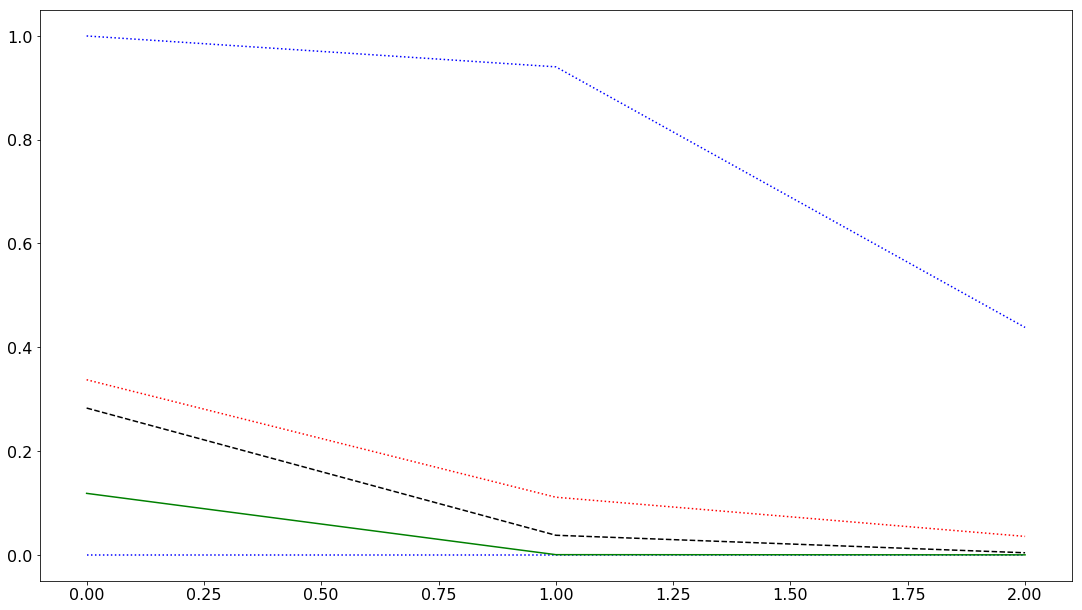

In [106]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 3
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M1)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M1)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M1)




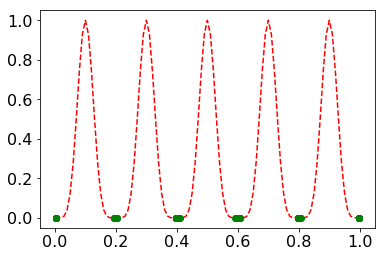

In [107]:
x = np.arange(0, 1, 0.01)
y = M1(x)
opt = M1(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

### M2

 Iteration 2

Last fit info______
Last fit mean: 0.0003153298829012204
Last fit std: 0.0023944290220743606
Last fit median: 5.1111292935701296e-08
Last fit min: 6.031087840698835e-20
Last fit max: 0.03620169776843555
Last Pop info______
Last Pop mean: [0.52877619]
Last Pop std: [0.29719177]
Last Pop median: [0.59771115]
Last Pop min: [0.00244907]
Last Pop max: [0.99994659]


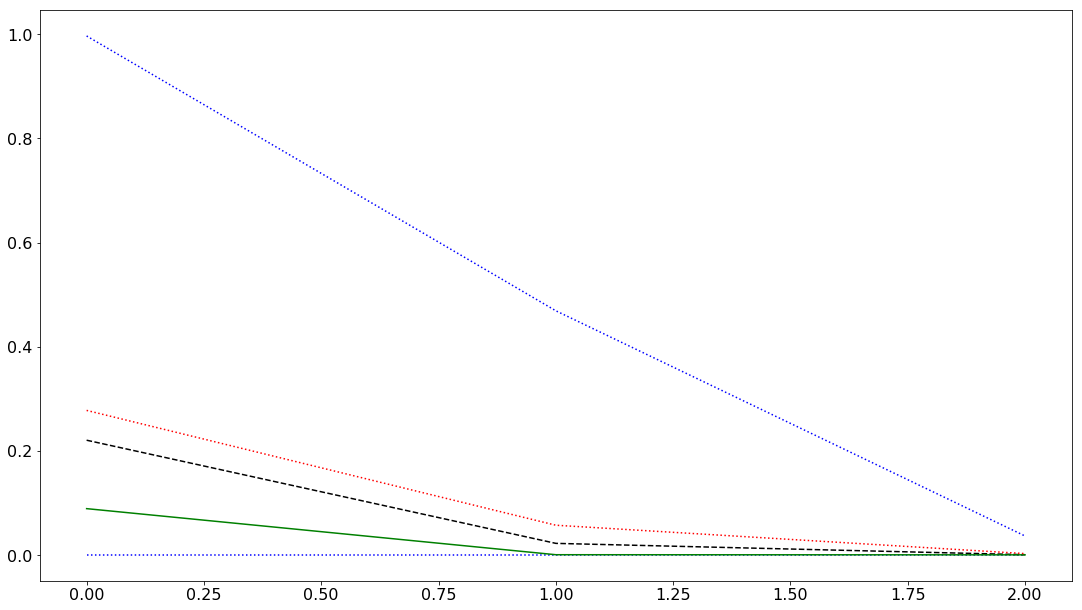

In [112]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 3
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M2)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M2)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M2)





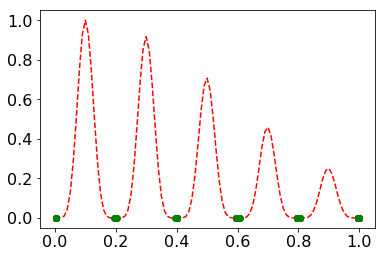

In [113]:
x = np.arange(0, 1, 0.01)
y = M2(x)
opt = M2(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

### M3

 Iteration 2

Last fit info______
Last fit mean: 0.008938767794368162
Last fit std: 0.08744958094810514
Last fit median: 4.0369688696242696e-08
Last fit min: 1.8179375521998237e-13
Last fit max: 0.9986663653070104
Last Pop info______
Last Pop mean: [0.44590951]
Last Pop std: [0.2390178]
Last Pop median: [0.55969329]
Last Pop min: [0.01012436]
Last Pop max: [0.84207675]


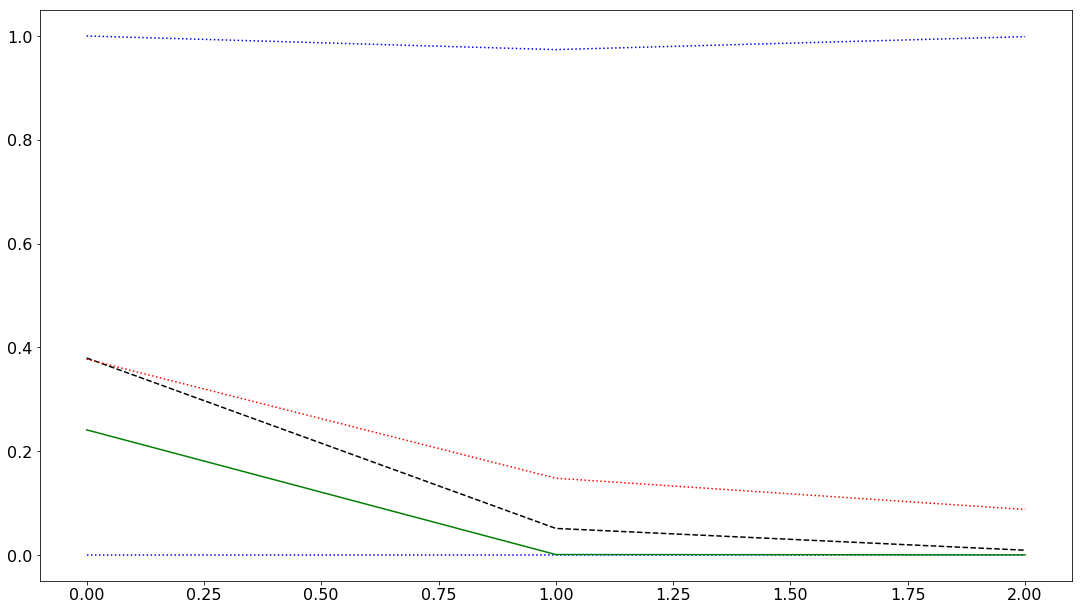

In [114]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 3
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M3)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M3)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M3)






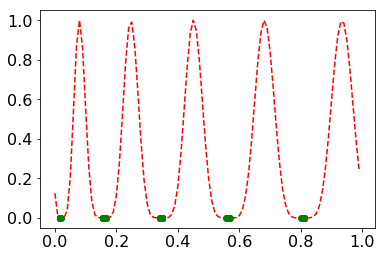

In [115]:
x = np.arange(0, 1, 0.01)
y = M3(x)
opt = M3(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()

### M4

 Iteration 2

Last fit info______
Last fit mean: 0.0017044400729997022
Last fit std: 0.01800067924851833
Last fit median: 1.070015524975324e-08
Last fit min: 1.7103124456324169e-19
Last fit max: 0.2504915118339753
Last Pop info______
Last Pop mean: [0.52711069]
Last Pop std: [0.26888875]
Last Pop median: [0.56128023]
Last Pop min: [0.01224537]
Last Pop max: [0.96585794]


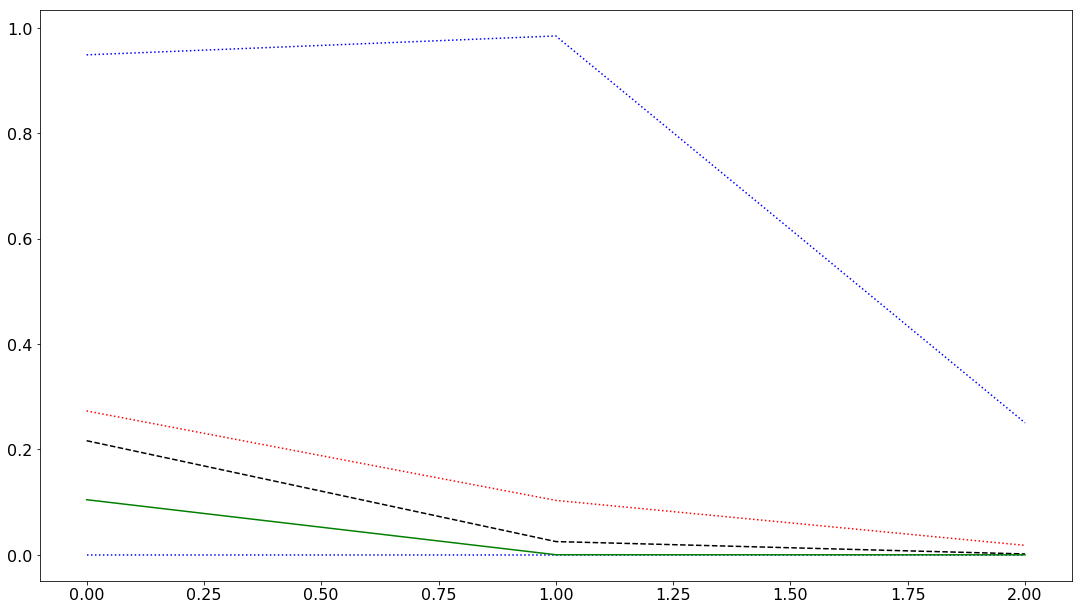

In [122]:
# Generate population
N = 256
minVal = 0
maxVal = 1
codeLen = 16
genQty = 1
d = codeLen * genQty
iterations = 3
matingPercent = 0.7
mutaPercent = 0.07
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []

for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M4)
    
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen_MultyM(pselect,
                                    matingPercent = matingPercent,
                                    mutaPercent = mutaPercent,
                                    minVal = minVal,
                                    maxVal = maxVal,
                                    codeLen = codeLen,
                                    funct = M4)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)
fitList,fitVal = ga.popfitnes(pop = Pop,minVal = minVal, maxVal = maxVal, codeLen = codeLen, genQty = genQty, funct = M4)







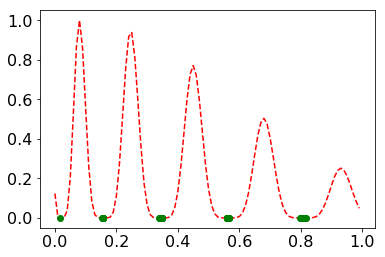

In [123]:
x = np.arange(0, 1, 0.01)
y = M4(x)
opt = M4(fitVal)
plt.plot(x, y,'r--',fitVal,opt,'go')
plt.show()